<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch01_03_DNN%EA%B8%B0%EC%B4%88_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.03 DNN기초-회귀 모델

---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 회귀 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 15장
* 데이터
  * 보스턴 집값 (boston houosing)
  * 캘리포티아 집값 (california housing) 

```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
!git clone https://github.com/LeeHuiJong/-Deep_learning.git

Cloning into '-Deep_learning'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 154 (delta 16), reused 1 (delta 1), pack-reused 105
Receiving objects: 100% (154/154), 81.25 MiB | 24.69 MiB/s, done.
Resolving deltas: 100% (57/57), done.


## 보스턴 집값 (boston houosing) 예측하기
---

> 1978년 집값에 가장 큰 영향을 미치는 것이 '깨끗한 공기' 라는 연구 겨로가가 하버드 대학교 도시개발학과에서 발표되었습니다. 이들은 자신의 주장을 뒷받침하기 위해 집값의 변동에 영향을 미치는 여러가지 요인을 모아서 환경과 집값의 변동을 보여주는 데이터셋을 만들었습니다. [ 모두의 딥러닝 중]


```
- 0 CRIM: 인구 1인당 범죄 발생 수
- 1 ZN: 25,000평방 피트 이상의 주거 구역 비중
- 2 INDUS: 소매업 외 상업이 차지하는 면적 비율
- 3 CHAS: 찰스강 위치 변수(1:강 주변, 0: 이외)
- 4 NOX: 일산화질소 농도
- 5 RM: 집의 평균 방 수
- 6 AGE: 1940년 이전에 지어진 비율
- 7 DIS: 5가지 보스턴 시 고용 시설까지의 거리
- 8 RAD: 순환고속도로의 접근 용이성
- 9 TAX: 10,000달러당 부동산 세율 총계
- 10 PTRATIO: 지역별 학생과 교사 비율
- 11 B: 지역별 흑인비율
- 12 LSTAT: 급여가 낮은 직업에 종사하는 인구 비율
- 13 가격 (단위 $1,000)
```

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-02.PNG?raw=true
 width=450>
</p>

### | 데이터 준비

#### **데이터 로드**
* `housing.csv`

In [8]:
data_path = '/content/-Deep_learning/dataset/housing.csv'
df = pd.read_csv(data_path,
                 header = None, # 첫번째 행이 데이터 (컬럼 없음)
                 delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                 )
print(df.shape)
# 샘플수: 506개
# 인풋: 13, 타겟: 1 = 총 14개 속성
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def path2data_housing(path, seed = 1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header = None, # 첫번째 행이 데이터 (컬럼 없음)
                   delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                   )
  
  # 정규화 전처리(x의 모든속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  
  # x,y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)
  
  return x_train, x_test, y_train, y_test

data_path = '/content/-Deep_learning/dataset/housing.csv'
x_train, x_test, y_train, y_test = path2data_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

(354, 13) (152, 13) (354,) (152,)
[-0.40053497  0.58526684 -0.87644514 -0.27259857 -0.87847549 -0.45394524
  0.88279471  1.4372583  -0.17812039 -0.7378796   0.57539459  0.23470271
  0.25048169] -0.7110141614338678


#### **데이터 전처리**

* 예측값 분포 확인

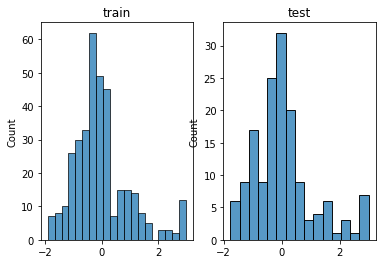

In [19]:
plt.subplot(121);sns.histplot(x=y_train);plt.title('train')
plt.subplot(122);sns.histplot(x=y_test);plt.title('test')
plt.show()

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-01.PNG?raw=true width=600>
</p>

#### **모델 생성**

In [21]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(shape = (13,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(15, activation = 'relu')(x)
  z1 = layers.Dense(6, activation = 'relu')(z)
  y = layers.Dense(1)(z1) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수는 사용안함)
  model = models.Model(x, y, name='house_regressor')

  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "house_regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 15)                210       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


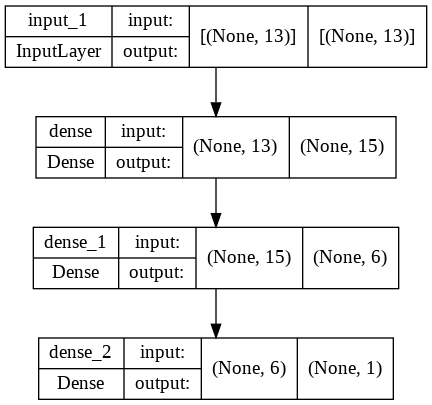

In [22]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes = True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer) 
```
* `loss` : 회귀문제, MSE(mean sqared error)
* `optimizer` : adam, 경사하강법(gradient descent) 기반의 더 성능 향상된 함수

In [35]:
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [38]:
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 16)

Epoch 1/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1028
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.1025
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.1061
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1058
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.1027
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0996
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0994
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0999
Epoch 10/200
23/23 [==============================] - 0s 3ms/step - loss: 0.0992
Epoch 11/200
23/23 [==============================] - 0s 2ms/step - loss: 0.0986
Epoch 12/200
23/23 [==============================] - 0s 4ms/step - loss: 0.1015
Epoch 13/200
23/23 [=================

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [39]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1442


0.1442401111125946

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [40]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_pred.shape, y_pred.shape

((152,), (152,))

* 예측 시각화

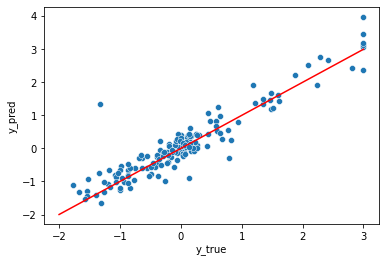

In [41]:
#for y, y_p in zip(y_test, y_pred):
#  print(y, y_p)

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([-2,3],[-2,3], c= 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

## 과제
---

### | 과제1. 회귀 문제 정리

* 예측값의 범위 : 연속, 무한, but 정규화
* 예측값의 shape : (샘플개수, 1) 혹은 (샘플개수, )
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : 없다.(회귀에서는)
* 손실함수 (loss) : mse, mae
* 평가함수 (metrics) : 사용하지 않음

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

def path2data_housing(path, seed = 1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header = None, # 첫번째 행이 데이터 (컬럼 없음)
                   delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                   )
  
  # 정규화 전처리(x의 모든속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  
  # x,y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)
  
  return x_train, x_test, y_train, y_test

# 데이터 준비
data_path = '/content/-Deep_learning/dataset/housing.csv'
x_train, x_test, y_train, y_test = path2data_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])


# 모델 만들기
def build_model():
  x = layers.Input(shape = (13,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(20, activation = 'relu')(x)
  z = layers.Dense(10, activation = 'relu')(z)
  z = layers.Dense(10, activation = 'relu')(z)
  z = layers.Dense(10, activation = 'relu')(z)
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수는 사용안함)
  model = models.Model(x, y, name='house_regressor')
  return model

# 모델 학습
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 16)
# 모델 컴파일
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')

# 결과 시각화
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([-2,3],[-2,3], c= 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

### | 과제 3. 캘리포니아 집값 예측

---

> 1990년 캘리포니아 인구조사 데이터인 캘리포니아 주택 가격(California Housing Prices) 데이터를 사용하며 학습을 통해 주택 가격을 예측하는 문제입니다.


```
- 0 longitude: 경도
- 1 latitude: 위도
- 2 housing_median_age: 주택나이 (중앙값)
- 3 total_rooms: 전체 방 수
- 4 total_bedrooms: 전체 침실 수
- 5 population: 인구
- 6 households: 세대
- 7 median_income: 소득(중앙값)
- 8 median_house_value: 주택 가치(중앙값)
```

* `/content/sample_data/california_housing_train.csv` 

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

In [51]:
df1 = pd.read_csv('/content/sample_data/california_housing_train.csv')
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Epoch 1/200
744/744 [==============================] - 1s 1ms/step - loss: 0.5353
Epoch 2/200
744/744 [==============================] - 1s 1ms/step - loss: 0.3267
Epoch 3/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2967
Epoch 4/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2855
Epoch 5/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2797
Epoch 6/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2721
Epoch 7/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2694
Epoch 8/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2642
Epoch 9/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2589
Epoch 10/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2566
Epoch 11/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2539
Epoch 12/200
744/744 [==============================] - 1s 1ms/step - loss: 0.2515
Epoch 13/200


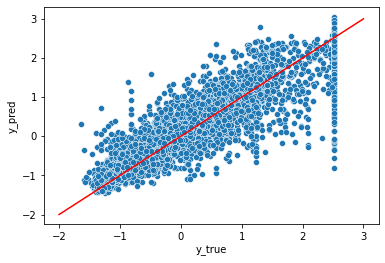

In [58]:
# 정규화 전처리(x의 모든속성, y)
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

# x,y 분할
x = df1[:, :-1] # 모든행(샘플), 0부터 12까지 열(속성)
y = df1[:, -1] # 모든행(샘플), 13번째 열(속성)

# train-test 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

def build_model():
  x = layers.Input(shape = (8,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(12, activation = 'relu')(x)
  z = layers.Dense(10, activation = 'relu')(z)
  z = layers.Dense(10, activation = 'relu')(z)
  z = layers.Dense(10, activation = 'relu')(z)
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의 shape는 고정(회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화 함수는 사용안함)
  model = models.Model(x, y, name='California_Housing_Prices')
  return model

# 모델 학습
model = build_model()
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam')
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 16)


# 예측 및 결과 시각화
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([-2,3],[-2,3], c= 'r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()